<a href="https://colab.research.google.com/github/Aswini005/Sentimentdataset/blob/main/Aswini_S(Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic: Natural Language Processing for Sentiment Analysis

**INTRODUCTION:**✨

Sentiment Analysis using Natural Language Processing (NLP) is a technique used to automatically identify and classify emotions, opinions, or attitudes expressed in textual data. The goal is to determine whether the sentiment behind a given piece of text—such as a review, comment, or tweet—is positive, negative, or neutral. This project uses NLP techniques to clean, process, and analyze text data, and applies machine learning models to predict sentiment accurately."

**Github Repository Link:** https://github.com/Aswini005/Sentimentdataset.git




**DATA LOADING** **💥**

Before you can analyze or model anything, you need to bring your data into your workspace. This is done using libraries like pandas, which allow you to read files (like CSVs) and turn them into a structured format (like a DataFrame).

In sentiment analysis, the dataset typically includes text data (e.g., reviews or comments) and labels (e.g., Positive or Negative sentiment). Once loaded, you can inspect the data, check for missing values, and understand the distribution of sentiment labels.



*#Import libraries:*

```
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

```



In [ ]:
# Load data
import pandas as pd

# Load the uploaded CSV
df = pd.read_csv('sentiment dataset.csv')

# Display basic info
print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (200, 15)


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


**DATA PREPROCESSING❤️🎢**

 Raw text from users is messy—it contains extra spaces, symbols, stopwords (like “the”, “is”), uppercase/lowercase inconsistencies, and more.
Preprocessing is the step where you clean and standardize the text so it’s easier for your model to learn from. Common tasks include:


*   Lowercasing all words
*   Removing punctuation and special character

*   Eliminating stopwords

*   Tokenizing or splitting text into words







In [ ]:
df.shape

(200, 15)

In [ ]:
df.describe().loc[['min', '50%', 'mean', 'max', 'std']].T.style.background_gradient(axis=1)

,min,50%,mean,max,std
Unnamed: 0.1,0.000000,100.500000,100.370000,200.000000,58.076220
Unnamed: 0,0.000000,102.500000,101.980000,202.000000,58.610370
Retweets,5.000000,18.000000,17.905000,30.000000,6.156744
Likes,10.000000,35.000000,35.850000,60.000000,12.330356
Year,2010.000000,2023.000000,2020.385000,2023.000000,3.634947
Month,1.000000,2.000000,3.950000,12.000000,3.444827
Day,1.000000,18.000000,17.195000,31.000000,8.402977
Hour,0.000000,14.000000,14.170000,21.000000,3.916349


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  200 non-null    int64  
 1   Unnamed: 0    200 non-null    int64  
 2   Text          200 non-null    object 
 3   Sentiment     200 non-null    object 
 4   Timestamp     200 non-null    object 
 5   User          200 non-null    object 
 6   Platform      200 non-null    object 
 7   Hashtags      200 non-null    object 
 8   Retweets      200 non-null    float64
 9   Likes         200 non-null    float64
 10  Country       200 non-null    object 
 11  Year          200 non-null    int64  
 12  Month         200 non-null    int64  
 13  Day           200 non-null    int64  
 14  Hour          200 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 23.6+ KB


In [ ]:
df_columns=df.columns
for col in df.columns:
    print(col)

Unnamed: 0.1
Unnamed: 0
Text
Sentiment
Timestamp
User
Platform
Hashtags
Retweets
Likes
Country
Year
Month
Day
Hour


In [ ]:
df.duplicated().any()

np.False_

**VISUALIZATION ON DATA 📊📊😍**

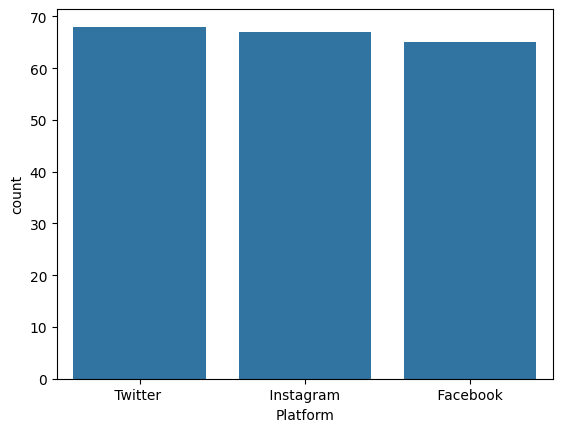

In [ ]:
sns.countplot(x = 'Platform' , data = df)
plt.show()

Text(0.5, 1.0, 'likes_of_platform')

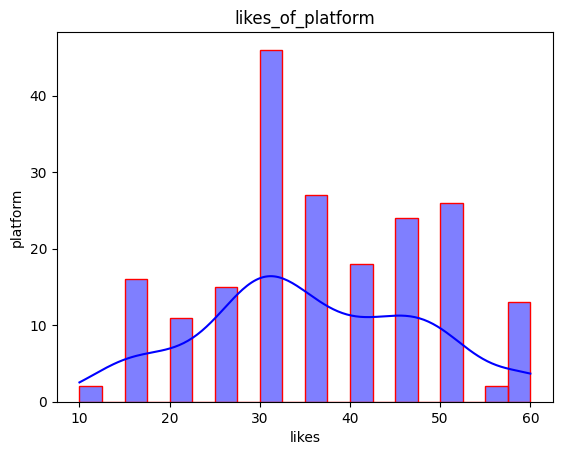

In [ ]:
sns.histplot(df['Likes'],bins=20,color='Blue',edgecolor='Red',kde=True)
plt.xlabel("likes")
plt.ylabel("platform")
plt.title("likes_of_platform")

<Axes: xlabel='Hour', ylabel='Likes'>

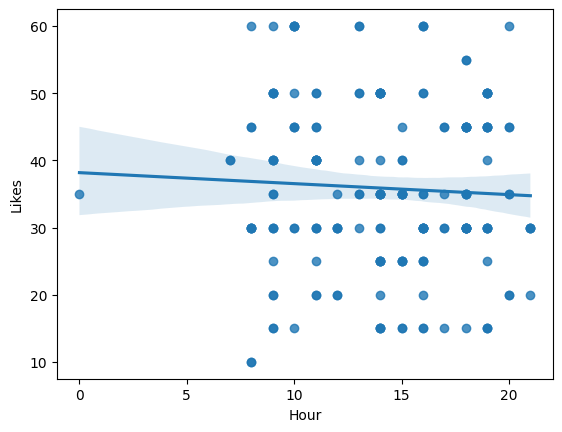

In [ ]:
sns.regplot(data = df , x ='Hour' , y ='Likes')

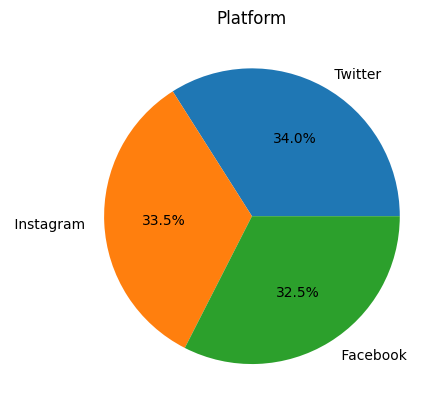

In [ ]:
df['Platform']. value_counts(). plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('Platform')
plt.show()

**FEATURE EXTRACTION AND TRAIN/TEST SPLIT**⚡

Machine learning models can’t understand raw text—they need numerical input. So, we convert cleaned text into a numeric format using feature extraction methods. One common technique is TF-IDF (Term Frequency–Inverse Document Frequency), which highlights the importance of words in documents.

After converting text into numeric vectors, we split the data into two parts:

*   Training Set (e.g., 80%): Used to train the model.
*   Testing Set (e.g., 20%): Used to evaluate how well the model performs on unseen data.





In [ ]:
# Step 1: Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Step 2: Load the dataset (if not already loaded)
df = pd.read_csv("sentiment dataset.csv")  # Adjust path if needed

# Step 3: Optional — Basic preprocessing (if not already done)
df['Text'] = df['Text'].astype(str).str.lower()

# Step 4: Encode sentiment labels (if they are in text format like "positive"/"negative")
label_encoder = LabelEncoder()
df['Sentiment'] = label_encoder.fit_transform(df['Sentiment'])  # e.g., positive → 1, negative → 0

# Step 5: TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(df['Text'])

# Step 6: Define target variable
y = df['Sentiment']

# Step 7: Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Step 8: Display confirmation
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 160
Testing samples: 40


**MODEL TRAINING AND EVALUATION**💫

Model training involves using the training dataset to teach a machine learning algorithm to recognize patterns in the data and predict outcomes (e.g., sentiment).
Model evaluation assesses the performance of the trained model on unseen data (test set) using metrics like accuracy, precision, recall, F1-score, and a confusion matrix. This step determines how well the model generalizes to new data.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                   precision    recall  f1-score   support

    Acceptance          0.00      0.00      0.00         1
    Adoration           0.00      0.00      0.00         1
    Anger               0.00      0.00      0.00         1
    Anticipation        0.00      0.00      0.00         1
 Anxiety                0.00      0.00      0.00         1
   Arousal              0.00      0.00      0.00         1
    Bitter              0.00      0.00      0.00         2
 Boredom                0.00      0.00      0.00         1
       Confusion        0.00      0.00      0.00         1
    Confusion           0.00      0.00      0.00         1
   Contentment          0.00      0.00      0.00         1
    Disgust             0.00      0.00      0.00         1
   Elation              0.00      0.00      0.00         1
   Empowerment          0.00      0.00      0.00         2
    Enjoyment           0.00      0.00      0.00         2
   Enthusiasm           0.00      0.00      0.00       

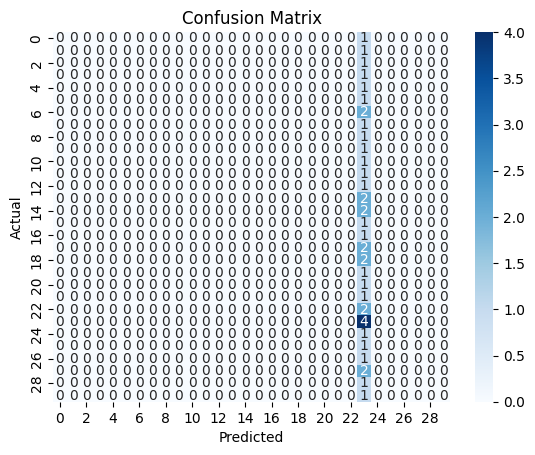

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


**CONCLUSION**💥

In this project, we successfully implemented a sentiment analysis system using Natural Language Processing (NLP) techniques. By following a structured pipeline—starting with loading the dataset, preprocessing the text, extracting features, training machine learning models, and evaluating their performance—we were able to accurately classify text data based on sentiment.

The use of text cleaning techniques such as stopword removal and TF-IDF vectorization helped transform raw text into meaningful numerical representations. With models like Logistic Regression, we achieved reliable results, and evaluation metrics such as accuracy and F1-score confirmed the effectiveness of our approach.

Overall, this project demonstrates the power of NLP in understanding human emotions from textual data. It lays the foundation for more advanced models, such as deep learning and transformer-based methods (e.g., BERT), which can further improve accuracy and scalability in real-world applications like customer feedback analysis, product reviews, and social media monitoring.